# PCA MNIST

## Import Libraries

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn.decomposition import PCA
import tensorflow as tf

## Load MNIST Data (NumPy)

In [2]:
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()

X_train = X_train.astype('single') #convert to single precision float, type accepted by PyTorch Linear Layers
X_test = X_test.astype('single')

X_train /= 255 #normalize between [0,1]
X_test /= 255

In [3]:
print(f'Training Data Shape: {X_train.shape}')
print(f'Training Ground Truth: {y_train.shape}')
print(f'Testing Data Shape: {X_test.shape}')
print(f'Testing Ground Truth : {y_test.shape}')

Training Data Shape: (60000, 28, 28)
Training Ground Truth: (60000,)
Testing Data Shape: (10000, 28, 28)
Testing Ground Truth : (10000,)


### Visualize Some Data

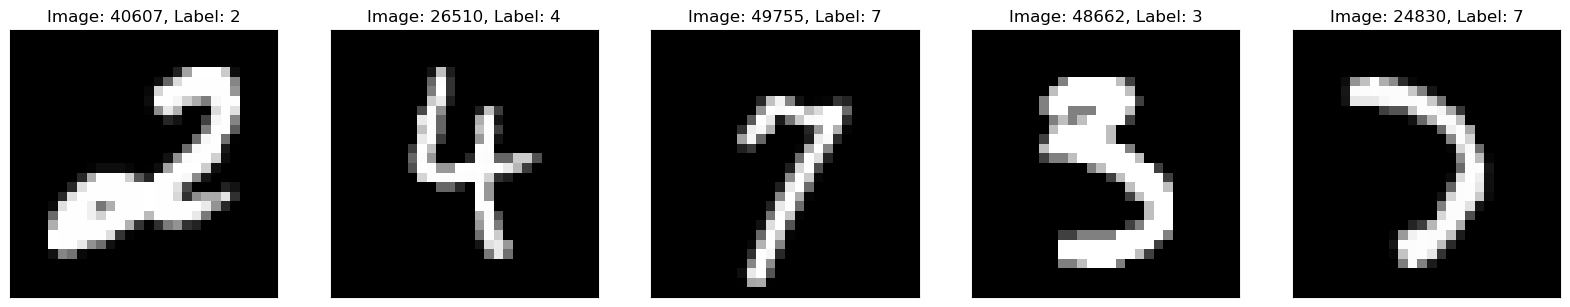

In [4]:
num_images = 5
ith_image = np.random.randint(low=0, high=X_train.shape[0], size=num_images)

fig, axs = plt.subplots(1,5, figsize=(20,4))

for i in np.arange(num_images):
    axs[i].tick_params(labelbottom=False,bottom=False,labelleft=False,left=False)
    axs[i].imshow(X_train[ith_image[i]],cmap='gray')
    axs[i].set_title(f"Image: {ith_image[i]}, Label: {y_train[ith_image[i]]}")

## Classification Using PCA

flatten images into vector

In [5]:
pca = PCA(n_components=2)
pca.fit(X_train.reshape(X_train.shape[0],-1),y_train) #fit pca to entire training set
df = pd.DataFrame(pca.transform(X_test.reshape(X_test.shape[0],-1)),columns=['PC1','PC2']) #apply transformation to testing set
df['digit'] = y_test

In [6]:
df_filtered = df.groupby('digit').head(500)

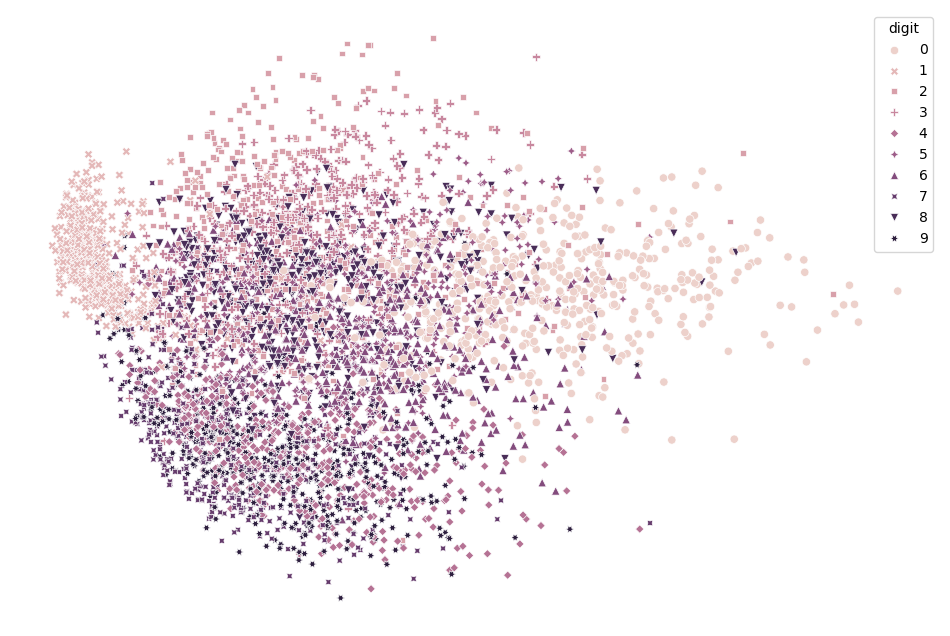

In [7]:
plt.figure(figsize=(12, 8))

cmap = plt.get_cmap('tab10')
fig = sns.scatterplot(data=df_filtered,x='PC1',y='PC2',hue='digit',style='digit', legend='full')


fig.tick_params(bottom=False, left=False)
fig.set(xticklabels=[],
        xlabel=None,
        yticklabels=[],
        ylabel=None)
fig.set_frame_on(False)
display()